In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
exersize_time = pd.read_csv("data/AppleExerciseTime.csv")

In [3]:
exersize_time.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Aditya’s Apple Watch,3.1,"<<HKDevice: 0x1c4c8b900>, name:Apple Watch, ma...",AppleExerciseTime,min,2016-11-05 22:54:48 -0800,2016-11-05 22:51:25 -0800,2016-11-05 22:52:25 -0800,1
1,Aditya’s Apple Watch,3.1,"<<HKDevice: 0x1c4c8b9a0>, name:Apple Watch, ma...",AppleExerciseTime,min,2016-11-06 12:19:18 -0800,2016-11-06 12:16:32 -0800,2016-11-06 12:17:32 -0800,1
2,Aditya’s Apple Watch,3.1,"<<HKDevice: 0x1c4c8b8b0>, name:Apple Watch, ma...",AppleExerciseTime,min,2016-11-06 12:20:17 -0800,2016-11-06 12:18:10 -0800,2016-11-06 12:19:10 -0800,1
3,Aditya’s Apple Watch,3.1,"<<HKDevice: 0x1c4c8b950>, name:Apple Watch, ma...",AppleExerciseTime,min,2016-11-06 12:45:53 -0800,2016-11-06 12:43:24 -0800,2016-11-06 12:44:24 -0800,1
4,Aditya’s Apple Watch,3.1,"<<HKDevice: 0x1c4c8b9f0>, name:Apple Watch, ma...",AppleExerciseTime,min,2016-11-06 13:31:57 -0800,2016-11-06 13:28:50 -0800,2016-11-06 13:29:50 -0800,1


In [4]:
exersize_time.dtypes

sourceName       object
sourceVersion    object
device           object
type             object
unit             object
creationDate     object
startDate        object
endDate          object
value             int64
dtype: object

In [5]:
exersize_time["startDate"] = pd.to_datetime(exersize_time["startDate"])
exersize_time["endDate"] = pd.to_datetime(exersize_time["endDate"])

In [6]:
exersize_time["startDate"] = exersize_time["startDate"].map(lambda x: str(x.month) + "/" + str(x.day) + "/" + str(x.year))

In [7]:
combined_energy_burned = exersize_time["value"].groupby(exersize_time["startDate"]).sum()

In [8]:
combined_energy_burned = combined_energy_burned.reset_index()

In [9]:
combined_energy_burned["startDate"] = pd.to_datetime(combined_energy_burned["startDate"])

In [10]:
combined_energy_burned.head()

,startDate,value
0,2017-01-01,10
1,2018-01-01,17
2,2017-01-10,72
3,2018-01-10,34
4,2017-01-11,59


In [11]:
sleep_activity = pd.read_csv("data/sleepAnalysisCombined.csv")

In [12]:
sleep_activity.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Clock,50,"<<HKDevice: 0x1c4a9e050>, name:iPhone, manufac...",SleepAnalysis,NaN,12/16/16 8:13,12/15/16 23:33,12/16/16 8:13,HKCategoryValueSleepAnalysisInBed
1,Clock,50,"<<HKDevice: 0x1c4a9dce0>, name:iPhone, manufac...",SleepAnalysis,NaN,12/17/16 8:00,12/16/16 23:47,12/17/16 8:00,HKCategoryValueSleepAnalysisInBed
2,Clock,50,"<<HKDevice: 0x1c4a9e1e0>, name:iPhone, manufac...",SleepAnalysis,NaN,12/18/16 8:13,12/18/16 4:44,12/18/16 8:13,HKCategoryValueSleepAnalysisInBed
3,Clock,50,"<<HKDevice: 0x1c4a9e370>, name:iPhone, manufac...",SleepAnalysis,NaN,12/19/16 10:00,12/19/16 0:51,12/19/16 10:00,HKCategoryValueSleepAnalysisInBed
4,Clock,50,"<<HKDevice: 0x1c4a9e280>, name:iPhone, manufac...",SleepAnalysis,NaN,12/20/16 8:00,12/20/16 0:12,12/20/16 8:00,HKCategoryValueSleepAnalysisInBed


In [13]:
sleep_activity["startDate"] = pd.to_datetime(sleep_activity["startDate"], format='%m/%d/%y %H:%M')
sleep_activity["endDate"] = pd.to_datetime(sleep_activity["endDate"], format='%m/%d/%y %H:%M')

In [14]:
sleep_activity["hoursSlept"] = (sleep_activity["endDate"] - sleep_activity["startDate"]).astype('timedelta64[h]')

In [15]:
sleep_activity["startDate"] = sleep_activity["startDate"].map(lambda x: str(x.month) + "/" + str(x.day) + "/" + str(x.year))

In [16]:
sleep_activity["creationDate"] = pd.to_datetime(sleep_activity["creationDate"])

In [17]:
sleep_frame = sleep_activity["hoursSlept"].groupby(sleep_activity["startDate"]).sum()

In [18]:
sleep_frame = sleep_frame.reset_index()

In [19]:
sleep_frame.head()

,startDate,hoursSlept
0,1/1/2017,5.0
1,1/1/2018,6.0
2,1/10/2018,1.0
3,1/11/2017,5.0
4,1/11/2018,2.0


In [20]:
final_df = combined_energy_burned.set_index("startDate").join(sleep_frame.set_index("startDate"), how="outer")

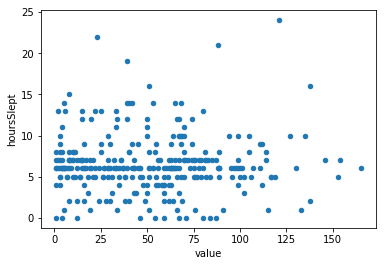

In [21]:
final_df.plot(x = "value", y = "hoursSlept", kind='scatter')